In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pickle 

from sklearn.metrics import roc_curve, precision_recall_curve, auc

def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)

In [ ]:
def get_result(in_dataset,num_classes, our_model, scale=1, size= (18,5)):
    results = {}
    ood_list = ['snli','imdb', 'multi30k', 'wmt16', 'yelp' ]


    name_list_1 = ['base','mc-dropout','temperature']
    rename_list_1 = ['MSP','DP','TS']

    for name, rename in zip (name_list_1, rename_list_1):
        results[rename] = {}
        for ood in ood_list:
            with open('result/%s/BERT-base-0/%s_%s_result.pt'%(in_dataset,name, ood), 'rb') as file:
                results[rename][ood] = pickle.load(file)


    name_list_2 = ['oe','manifold-smoothing']
    rename_list_2 = ['OE','MSC',]

    for name, rename in zip (name_list_2, rename_list_2):
        results[rename] = {}
        for ood in ood_list:
            with open('result/%s/BERT-%s-0/%s_%s_result.pt'%(in_dataset,name,name, ood), 'rb') as file:
                results[rename][ood] = pickle.load(file)


    name_list_3 = ['ori','OE','AD', 'MIX']
    rename_list_3 = ['ENN','+OE','+AD', 'MIX']

    for name, rename in zip (name_list_3, rename_list_3):
        results[rename] = {}
        for ood in ood_list:
            with open('result/%s/ENN_%s/%s_%s_result.pt'%(in_dataset,name,name, ood), 'rb') as file:
                results[rename][ood] = pickle.load(file)      


    for ood_name in ood_list:

        key_in = 'in_ent'
        key_ood = 'ood_ent'

        df1 = [
                results['MSP'][ood_name][key_in]/np.log(num_classes),
                results['DP'][ood_name][key_in]/np.log(num_classes),
                results['ENN'][ood_name]['in_ent']/np.log(num_classes),
                results['TS'][ood_name][key_in]/np.log(num_classes),
                results['MSC'][ood_name][key_in]/np.log(num_classes),
                results['OE'][ood_name][key_in]/np.log(num_classes),
                results[our_model][ood_name]['in_vac'],
                np.power(results[our_model][ood_name]['in_dis'], scale)
        ]

        df2 = [
                results['MSP'][ood_name][key_ood]/np.log(num_classes),
                results['DP'][ood_name][key_ood]/np.log(num_classes),
                results['ENN'][ood_name]['ood_ent']/np.log(num_classes),
                results['TS'][ood_name][key_ood]/np.log(num_classes),
                results['MSC'][ood_name][key_ood]/np.log(num_classes),
                results['OE'][ood_name][key_ood]/np.log(num_classes),
                results[our_model][ood_name]['ood_vac'],
                np.power(results[our_model][ood_name]['ood_dis'], scale)
        ]

        ticks = ['MSP','DP','ENN','TS','MSC','OE','Vac','Dis']
        plt.figure(figsize=size)

        plt.subplot(2, 2, 1)

        plt.tick_params(which='major',width=1)
        plt.tick_params(which='major',length=5)

        bpl = plt.boxplot(df1, positions=np.array(range(len(df1)))*2.0-0.4, sym='', widths=0.6)
        bpr = plt.boxplot(df2, positions=np.array(range(len(df2)))*2.0+0.4, sym='', widths=0.6)
        set_box_color(bpl, 'blue') 
        set_box_color(bpr, 'red')

        # draw temporary red and blue lines and use them to create a legend
        plt.plot([], c='blue', label='ID')
        plt.plot([], c='red', label='OOD')
        plt.legend(prop = {'size':15})
        plt.yticks([0,0.5,1],fontsize=15)
        plt.xticks(range(0, len(ticks) * 2, 2), ticks, fontsize=15,rotation=45)
        plt.xlim(-1, len(ticks)*2)
        plt.ylim(-0.02, 1.02)
        plt.title('%s vs %s  Entropy'%(in_dataset, ood_name))

        key_in = 'succ_ent'
        key_ood = 'fail_ent'

        df1 = [
                results['MSP'][ood_name][key_in]/np.log(num_classes),
                results['DP'][ood_name][key_in]/np.log(num_classes),
                results['ENN'][ood_name]['succ_ent']/np.log(num_classes),
                results['TS'][ood_name][key_in]/np.log(num_classes),
                results['MSC'][ood_name][key_in]/np.log(num_classes),
                results['OE'][ood_name][key_in]/np.log(num_classes),
                results['MIX'][ood_name]['succ_vac'],
                np.power(results['MIX'][ood_name]['succ_dis'], scale)
        ]

        df2 = [
                results['MSP'][ood_name][key_ood]/np.log(num_classes),
                results['DP'][ood_name][key_ood]/np.log(num_classes),
                results['ENN'][ood_name]['fail_ent']/np.log(num_classes),
                results['TS'][ood_name][key_ood]/np.log(num_classes),
                results['MSC'][ood_name][key_ood]/np.log(num_classes),
                results['OE'][ood_name][key_ood]/np.log(num_classes),
                results[our_model][ood_name]['fail_vac'],
                np.power(results[our_model][ood_name]['fail_dis'], scale)
        ]


        ticks = ['MSP','DP','ENN','TS','MSC','OE','Vac','Dis']

        plt.subplot(2, 2, 2)

        plt.tick_params(which='major',width=1)
        plt.tick_params(which='major',length=5)

        bpl = plt.boxplot(df1, positions=np.array(range(len(df1)))*2.0-0.4, sym='', widths=0.6)
        bpr = plt.boxplot(df2, positions=np.array(range(len(df2)))*2.0+0.4, sym='', widths=0.6)
        set_box_color(bpl, 'blue') 
        set_box_color(bpr, 'red')

        # draw temporary red and blue lines and use them to create a legend
        plt.plot([], c='blue', label='Succ')
        plt.plot([], c='red', label='Fail')
        plt.legend(prop = {'size':15})
        plt.yticks([0,0.5,1],fontsize=15)
        plt.xticks(range(0, len(ticks) * 2, 2), ticks, fontsize=15,rotation=45)
        plt.xlim(-1, len(ticks)*2)
        plt.ylim(-0.02, 1.02)
        plt.title('%s: Succ vs Fail prediction'%(in_dataset))

In [ ]:
def get_mean_result(in_dataset,num_classes, our_model, scale=1, size=(18,6)):

    results = {}
    ood_list = ['snli','imdb', 'multi30k', 'wmt16', 'yelp' ]


    name_list_1 = ['base','mc-dropout','temperature']
    rename_list_1 = ['MSP','DP','TS']

    for name, rename in zip (name_list_1, rename_list_1):
        results[rename] = {}
        for ood in ood_list:
            with open('result/%s/BERT-base-0/%s_%s_result.pt'%(in_dataset,name, ood), 'rb') as file:
                results[rename][ood] = pickle.load(file)


    name_list_2 = ['oe','manifold-smoothing']
    rename_list_2 = ['OE','MSC',]

    for name, rename in zip (name_list_2, rename_list_2):
        results[rename] = {}
        for ood in ood_list:
            with open('result/%s/BERT-%s-0/%s_%s_result.pt'%(in_dataset,name,name, ood), 'rb') as file:
                results[rename][ood] = pickle.load(file)


    name_list_3 = ['ori','OE','AD', 'MIX']
    rename_list_3 = ['ENN','+OE','+AD', 'MIX']

    for name, rename in zip (name_list_3, rename_list_3):
        results[rename] = {}
        for ood in ood_list:
            with open('result/%s/ENN_%s/%s_%s_result.pt'%(in_dataset,name,name, ood), 'rb') as file:
                results[rename][ood] = pickle.load(file)     

    DF1 = []
    DF2 = []
    for ood_name in ood_list:
        df1 = [
                results['MSP'][ood_name]['in_ent']/np.log(num_classes),
                results['DP'][ood_name]['in_ent']/np.log(num_classes),
                results['ENN'][ood_name]['in_ent']/np.log(num_classes),
                results['TS'][ood_name]['in_ent']/np.log(num_classes),
                results['MSC'][ood_name]['in_ent']/np.log(num_classes),
                results['OE'][ood_name]['in_ent']/np.log(num_classes),
                results[our_model][ood_name]['in_ent']/np.log(num_classes),
                results[our_model][ood_name]['in_vac'],
                np.power(results[our_model][ood_name]['in_dis'], scale)
            ]
        df2 = [
                results['MSP'][ood_name]['ood_ent']/np.log(num_classes),
                results['DP'][ood_name]['ood_ent']/np.log(num_classes),
                results['ENN'][ood_name]['ood_ent']/np.log(num_classes),
                results['TS'][ood_name]['ood_ent']/np.log(num_classes),
                results['MSC'][ood_name]['ood_ent']/np.log(num_classes),
                results['OE'][ood_name]['ood_ent']/np.log(num_classes),
                results[our_model][ood_name]['ood_ent']/np.log(num_classes),
                results[our_model][ood_name]['ood_vac'],
                np.power(results[our_model][ood_name]['ood_dis'], scale)
                       ]
        DF1.append(df1)
        DF2.append(df2)
    DF1 =np.concatenate(DF1, axis=1).T
    DF2 =np.concatenate(DF2, axis=1).T


    DF3 = [
            results['MSP'][ood_name]['succ_ent']/np.log(num_classes),
            results['DP'][ood_name]['succ_ent']/np.log(num_classes),
            results['ENN'][ood_name]['succ_ent']/np.log(num_classes),
            results['TS'][ood_name]['succ_ent']/np.log(num_classes),
            results['MSC'][ood_name]['succ_ent']/np.log(num_classes),
            results['OE'][ood_name]['succ_ent']/np.log(num_classes),
            results[our_model][ood_name]['succ_ent']/np.log(num_classes),
            results[our_model][ood_name]['succ_vac'],
            np.power(results[our_model][ood_name]['succ_dis'], scale)
    ]

    DF4 = [
            results['MSP'][ood_name]['fail_ent']/np.log(num_classes),
            results['DP'][ood_name]['fail_ent']/np.log(num_classes),
            results['ENN'][ood_name]['fail_ent']/np.log(num_classes),
            results['TS'][ood_name]['fail_ent']/np.log(num_classes),
            results['MSC'][ood_name]['fail_ent']/np.log(num_classes),
            results['OE'][ood_name]['fail_ent']/np.log(num_classes),
            results[our_model][ood_name]['fail_ent']/np.log(num_classes),
            results[our_model][ood_name]['fail_vac'],
            np.power(results[our_model][ood_name]['fail_dis'], scale)
    ]


    ticks = ['MSP','DP','ENN','TS','MSC','OE','Ent','Vac','Dis']
    ticks = ['MSP','DP','ENN','TS','MSC','OE','Ent','Vac','Dis']
    
    plt.figure(figsize=size)

    plt.subplot(2, 2, 1)

    plt.tick_params(which='major',width=1)
    plt.tick_params(which='major',length=5)

    bpl = plt.boxplot(DF1, positions=np.array(range(len(ticks)))*2.0-0.4, sym='', widths=0.6)
    bpr = plt.boxplot(DF2, positions=np.array(range(len(ticks)))*2.0+0.4, sym='', widths=0.6)
    set_box_color(bpl, 'blue') 
    set_box_color(bpr, 'red')

    # draw temporary red and blue lines and use them to create a legend
    plt.plot([], c='blue', label='ID')
    plt.plot([], c='red', label='OOD')
    plt.legend(prop = {'size':15})
#     plt.legend(prop = {'size':15}, loc="upper center",bbox_to_anchor=(0,0.2,1,1.1),  ncol = 2,frameon=False)
    # plt.grid(True)
    plt.yticks([0,0.5,1],fontsize=15)
    plt.xticks(range(0, len(ticks) * 2, 2), ticks, fontsize=15,rotation=45)
    plt.xlim(-1, len(ticks)*2)
    plt.ylim(-0.02, 1.02)
    plt.title('%s: ID vs OOD'%(in_dataset))

#     plt.figure(figsize=size)
    plt.subplot(2, 2, 2)

    plt.tick_params(which='major',width=1)
    plt.tick_params(which='major',length=5)

    bpl = plt.boxplot(DF3, positions=np.array(range(len(ticks)))*2.0-0.4, sym='', widths=0.6)
    bpr = plt.boxplot(DF4, positions=np.array(range(len(ticks)))*2.0+0.4, sym='', widths=0.6)
    set_box_color(bpl, 'blue') 
    set_box_color(bpr, 'red')

    # draw temporary red and blue lines and use them to create a legend
    plt.plot([], c='blue', label='Succ')
    plt.plot([], c='red', label='Fail')
    plt.legend(prop = {'size':15})
#     plt.legend(prop = {'size':15}, loc="upper center",bbox_to_anchor=(0,0.2,1,1.1),  ncol = 2,frameon=False)
    # plt.grid(True)
    plt.yticks([0,0.5,1],fontsize=15)
    plt.xticks(range(0, len(ticks) * 2, 2), ticks, fontsize=15,rotation=45)
    plt.xlim(-1, len(ticks)*2)
    plt.ylim(-0.02, 1.02)
    plt.title('%s: Succ vs Fail prediction'%(in_dataset))



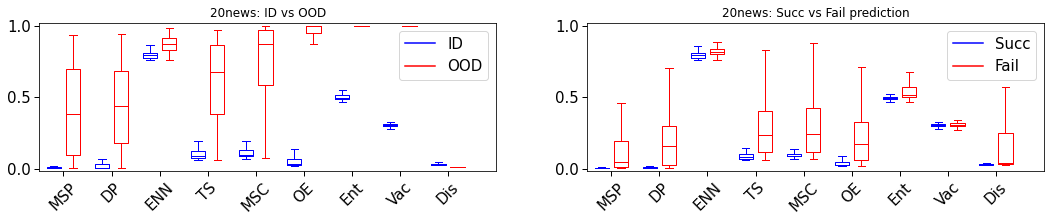

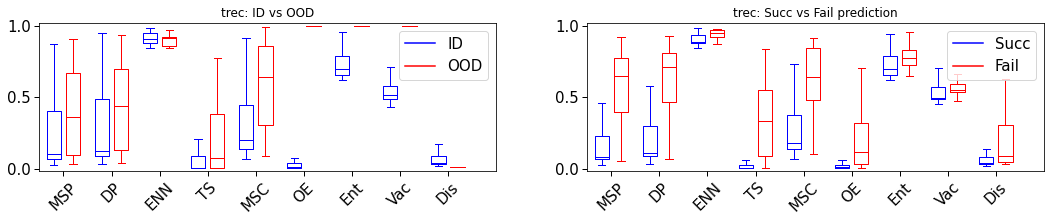

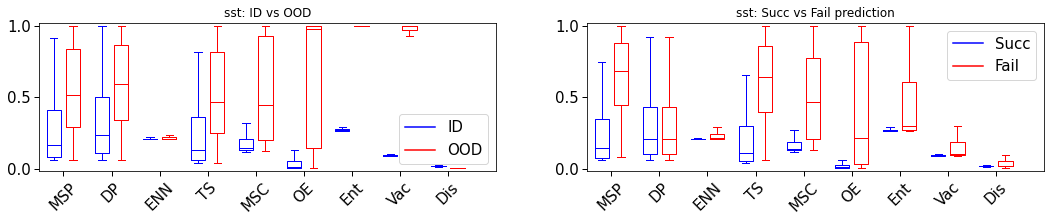

In [ ]:
size = (18,6)
get_mean_result('20news',20, 'MIX',1/2,size)
get_mean_result('trec',50, 'MIX',1/2,size)
get_mean_result('sst',2, 'MIX',1/2,size)

# 20News

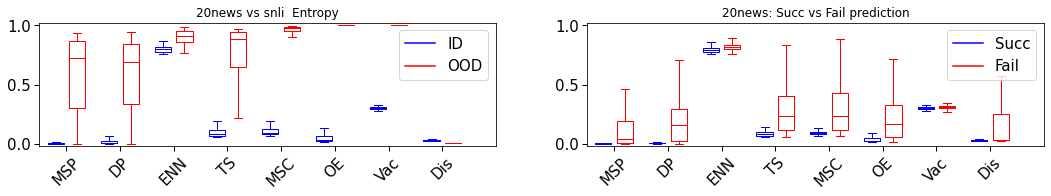

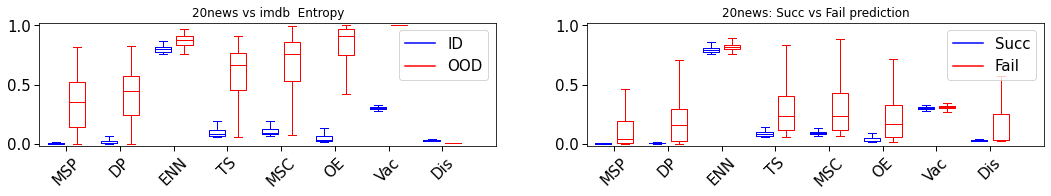

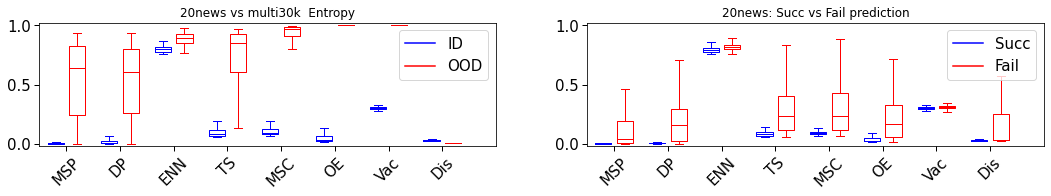

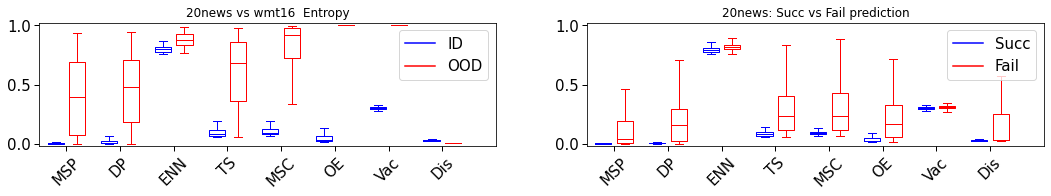

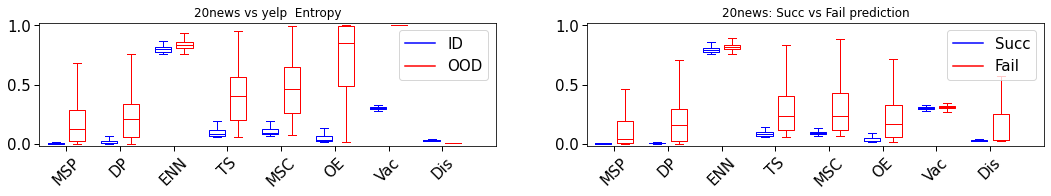

In [ ]:
get_result('20news',20, 'MIX',1/2)

# TREC

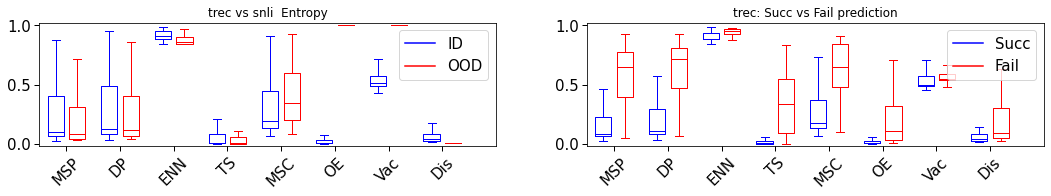

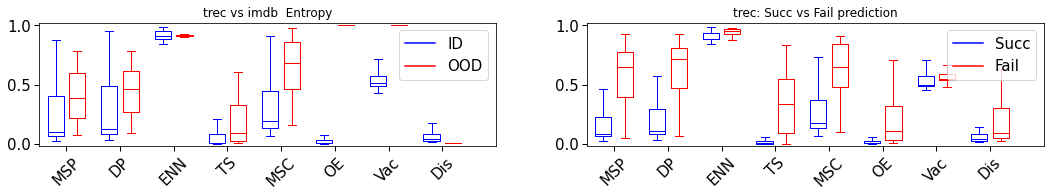

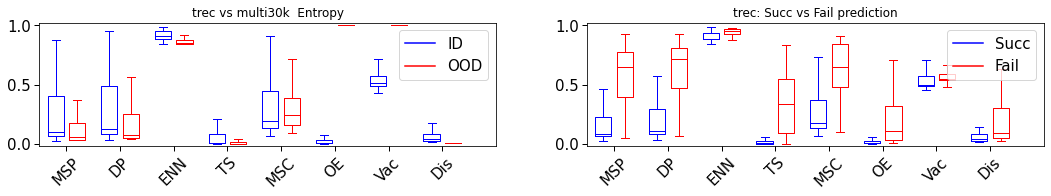

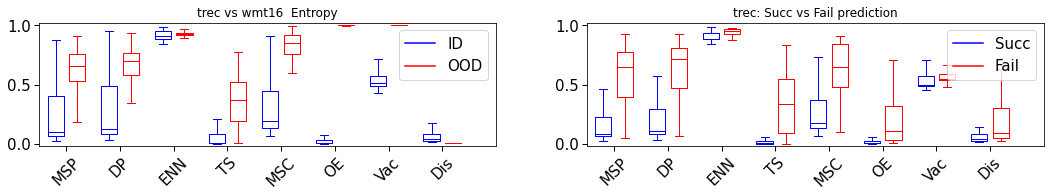

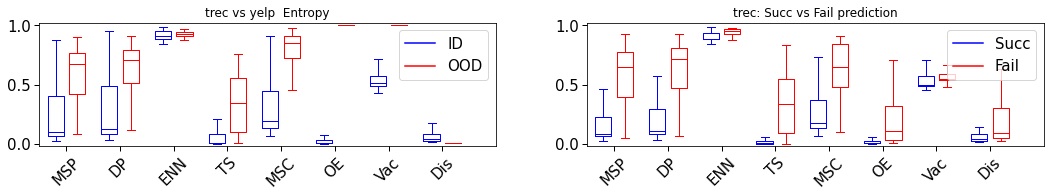

In [ ]:
get_result('trec',50, 'MIX',1/2)

# SST

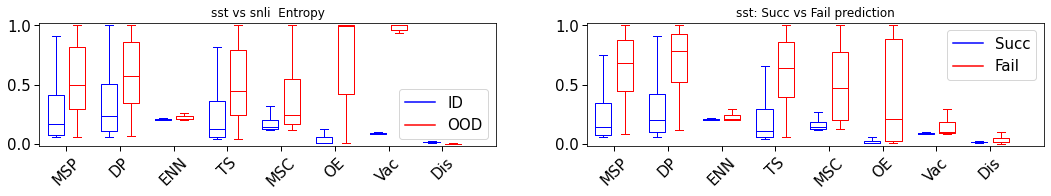

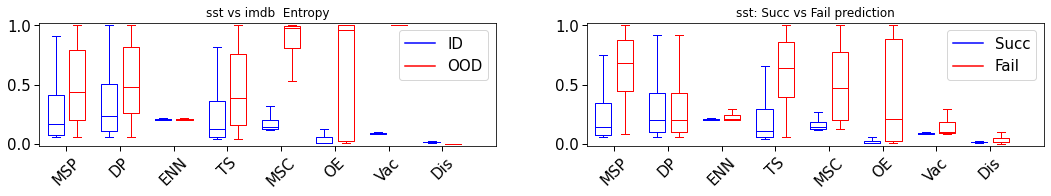

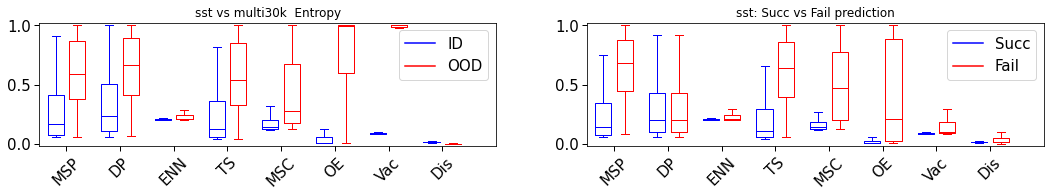

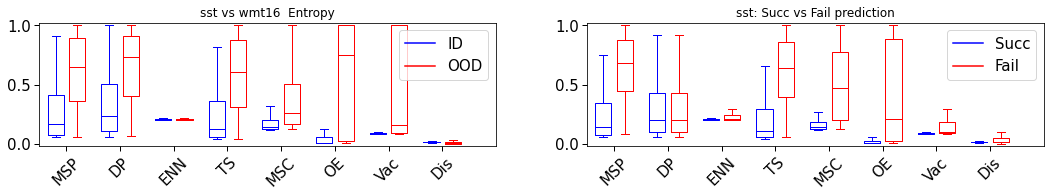

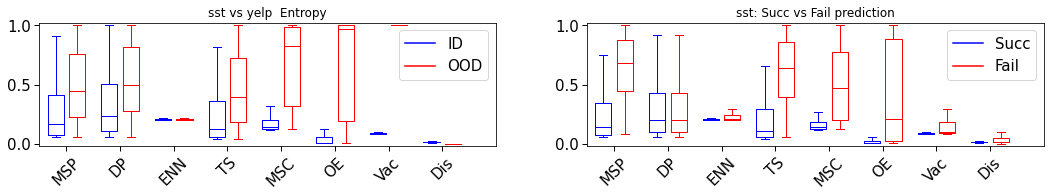

In [ ]:
get_result('sst',2, 'MIX',1/2)

Text(0.5, 0, 'perturbation')

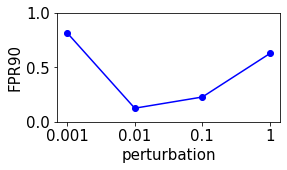

In [ ]:
plt.figure(figsize=(4,2))
y1= np.array([0.819,0.125,0.228,0.629])
ticks = [1e-3, 1e-2, 0.1,1]
plt.plot(range(4),y1,'bo-')
plt.yticks([0,0.5,1],fontsize=15)
plt.xticks(range(4), ticks, fontsize=15)
plt.ylabel('FPR90', fontsize=15)
plt.xlabel('perturbation', fontsize=15)